# Bayes Classifier

1. Test to see if features are approximately normal in each class

In [7]:
''' Needed libraries '''

import numpy as np # For matrix operations and numerical processing
import matplotlib.pyplot as plt # For plotting
import os, sys # For filepaths

In [8]:
''' Add the datasets and libraries to the system path '''

# Find the path to our implementations
current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)
home_directory = os.path.dirname(parent_directory)
libraries_path = os.path.join(home_directory, 'Libraries')

# Find the path to the datasets
datasets_path = os.path.join(home_directory, 'Datasets')

# Add them both to the system path
sys.path.append(datasets_path)
sys.path.append(libraries_path)

In [10]:
''' Importing our Bayes classifier '''

from Bayes import Bayes_classifier

In [11]:
''' Importing main components from file '''
top_components = np.load(os.path.join(f"{home_directory}/Exported_Data", 'LDA_top2.npy')) # Import top_components from file

''' Import the projection matrix from file '''
projection_matrix = np.load(os.path.join(f"{home_directory}/Exported_Data", 'LDA_projection.npy')) # Import projection_matrix from file

In [12]:
''' Loading in the dataset and splitting into observations and labels '''

dataset= np.load(os.path.join(datasets_path, 'fashion_train.npy'))  # Load dataset
X = dataset[:, :-1] # Define X as all columns except the last one
y = dataset[:, -1] # Define y as the last column
X.shape[0]


10000

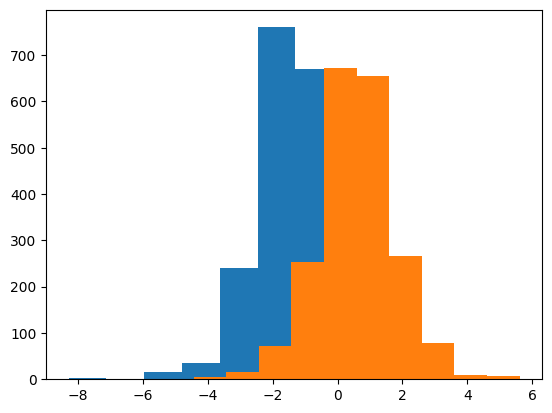

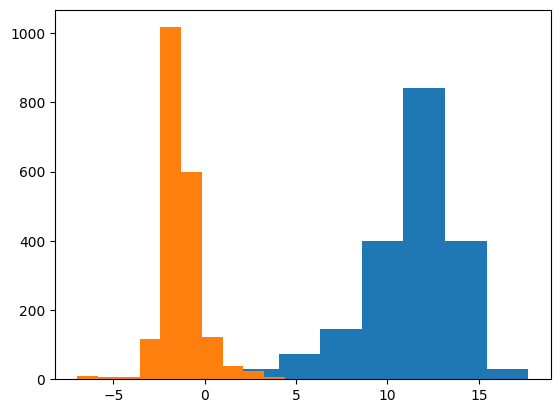

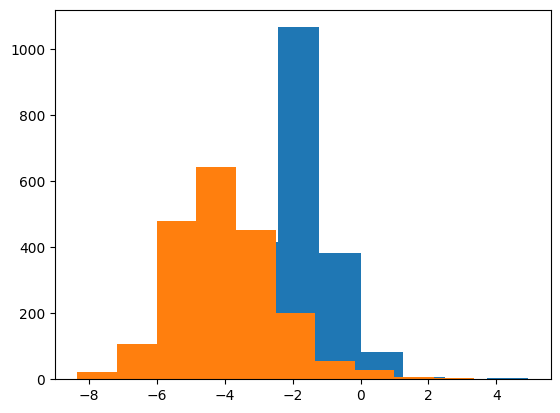

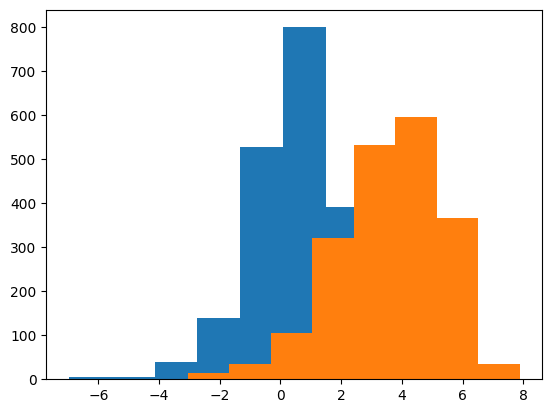

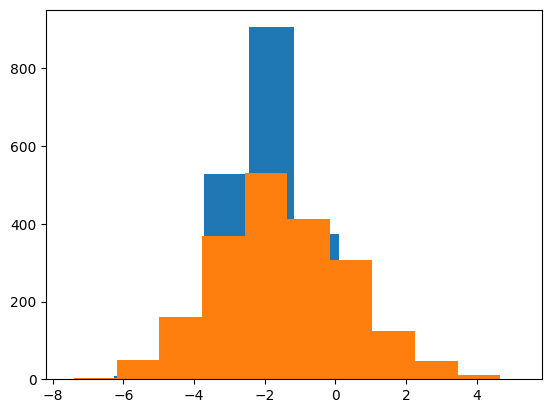

In [13]:
''' PLotting the distribution of the LDA features for each class'''

for i in np.unique(y):
    f1=projection_matrix[y==i][:,0]
    f2=projection_matrix[y==i][:,1]
    plt.hist(f1)
    plt.hist(f2)
    plt.show()


Class priors

In [14]:
''' class priors '''
class_priors=[]
n = X.shape[0]
for i in np.unique(y):
    class_prior = X[y==i].shape[0]/n
    class_priors.append(class_prior)

print(class_priors)


[0.2033, 0.1947, 0.2001, 0.2005, 0.2014]


Means of each feature for each class 

In [15]:
''' density functions of X for each class '''
# we assume each feature in each class has a normal distribution 
''' means for each class '''
means = dict({})
for i in np.unique(y):
    meanfeatures = []
    for feature in range(projection_matrix.shape[1]):
        mean=np.mean(projection_matrix[y==i][:,feature])
        meanfeatures.append(mean)

    means[i] = meanfeatures 
means

{0: [-1.2802700016019868, 0.6039621758063101],
 1: [11.165085908392799, -1.3346697113354848],
 2: [-1.792848734273685, -4.0010271878014345],
 3: [0.5517463994100597, 3.5860176785069986],
 4: [-1.8373911430659382, -1.4957990391986888]}

Variances of each feature for each class 

In [16]:
variances = dict({})
for i in np.unique(y):
    variancefeatures = []
    for feature in range(projection_matrix.shape[1]):
        variance=np.var(projection_matrix[y==i][:,feature])
        variancefeatures.append(variance)

    variances[i] = variancefeatures 
variances

{0: [1.6240272271400915, 1.4014820774384151],
 1: [8.070526988779214, 1.176553854948992],
 2: [1.0405445983810633, 2.3216706354737338],
 3: [2.369089465355057, 3.0492142495787906],
 4: [1.535525042922837, 3.4967538119843016]}

Density function of X for each class

# Bayes classifier

In [17]:
lda = Bayes_classifier(X, y, projection_matrix) # Initialize our LDA

In [21]:
lda.means()
means[0][1]

{0: [-1.2802700016019868, 0.6039621758063101],
 1: [11.165085908392799, -1.3346697113354848],
 2: [-1.792848734273685, -4.0010271878014345],
 3: [0.5517463994100597, 3.5860176785069986],
 4: [-1.8373911430659382, -1.4957990391986888]}

In [19]:
lda.variances()

{0: [1.6240272271400915, 1.4014820774384151],
 1: [8.070526988779214, 1.176553854948992],
 2: [1.0405445983810633, 2.3216706354737338],
 3: [2.369089465355057, 3.0492142495787906],
 4: [1.535525042922837, 3.4967538119843016]}

In [20]:
lda.class_priors()

[0.2033, 0.1947, 0.2001, 0.2005, 0.2014]